In [1]:
import numpy 
import os
import ast
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib import pyplot as plt

from wquantiles import quantile
from openfisca_survey_manager.utils import asof

from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
from openfisca_france_indirect_taxation.examples.utils_example import (
    wavg,
    collapse,
    dataframe_by_group,
    graph_builder_bar,
    df_weighted_average_grouped)
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile

from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax import carbon_tax_rv
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Simulation_taxe_energie_winners_losers import (
    simulate_reformes_energie,
    run_all_elasticities,
    graph_winners_losers,
    graph_net_transfers,
    graph_effort_rate,
    quantiles_for_boxplot,
    boxplot_effort_rate,
    boxplot_net_transfers
    )

In [2]:
data_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data"
output_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Output"
elasticite = True
replique_gouv = True

In [3]:
df_elasticities = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_literature.csv'), sep = ";")
df_elasticities = df_elasticities.astype({'ref_elasticity': str, 'elas_price_1_1': float , 'elas_price_2_2' : float ,'elas_price_3_3' : float })

# exemple
#elasticites = df_elasticities[df_elasticities['ref_elasticity'] == 'Douenne (2020)'] 

In [4]:
to_graph, menages_reform = run_all_elasticities(df_elasticities, year = 2019, reform = carbon_tax_rv,bonus_cheques_uc=True)

In [21]:
menages_reform.to_csv(os.path.join(output_path,'Data/menages_reform.csv'))

In [4]:
menages_reform = pd.read_csv(os.path.join(output_path,'Data/menages_reform.csv'), index_col = 0)

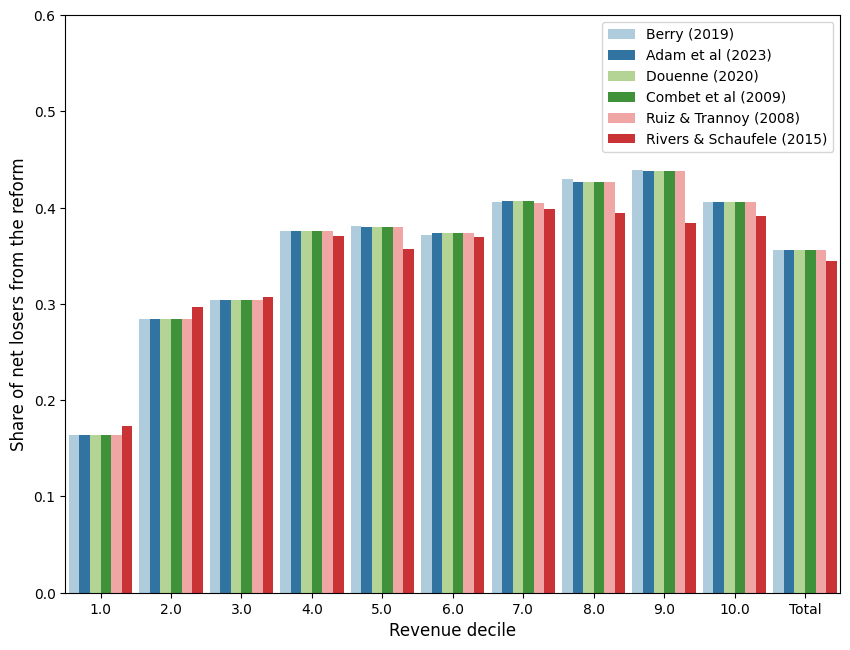

In [5]:
graph_winners_losers(to_graph,carbon_tax_rv,elas_vect= False,bonus_cheques_uc=True)

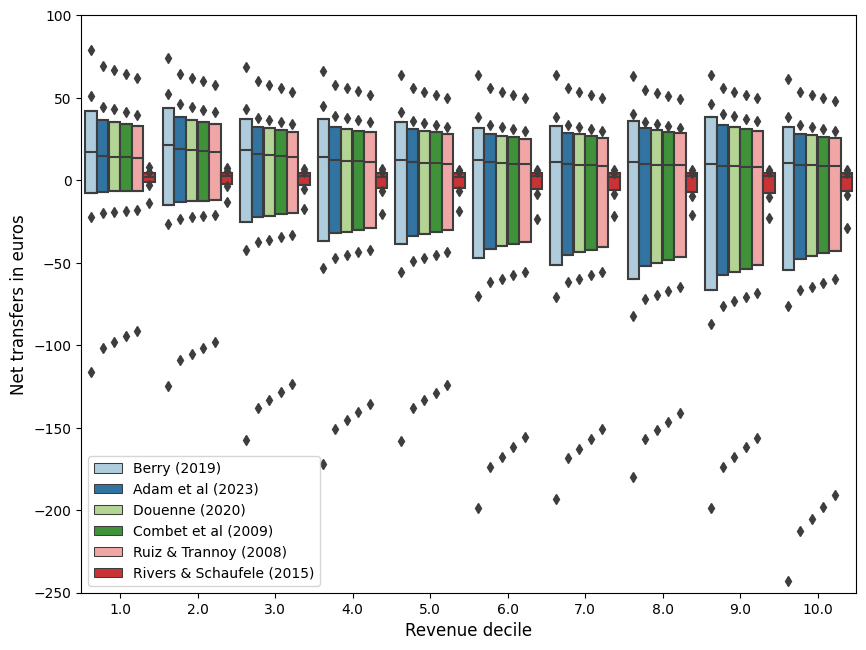

In [9]:
boxplot_net_transfers(menages_reform, carbon_tax_rv, elas_vect=False, bonus_cheques_uc=True)

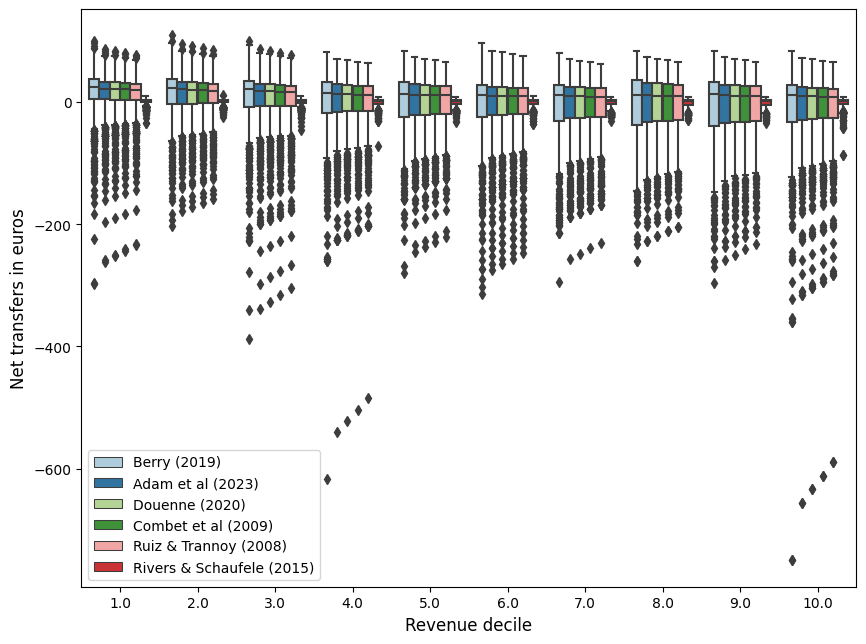

In [5]:
#graph pas pondéré
plt.figure(figsize= (10,7.5))
hue_order = ['Berry (2019)', 'Adam et al (2023)', 'Douenne (2020)', 'Combet et al (2009)', 'Ruiz & Trannoy (2008)','Rivers & Schaufele (2015)']
sns.boxplot(data = menages_reform, x = "niveau_vie_decile", y = "Net_transfers_reform", hue = 'ref_elasticity', hue_order = hue_order, palette = sns.color_palette("Paired"))
plt.xlabel('Revenue decile', fontdict = {'fontsize' : 12})
plt.ylabel('Net transfers in euros', fontdict = {'fontsize' : 12})
plt.legend()

In [26]:
test = menages_reform[menages_reform['ref_elasticity'] == 'Douenne (2020)']
test.reset_index(inplace = True)
test.drop('index', axis = 1, inplace = True)

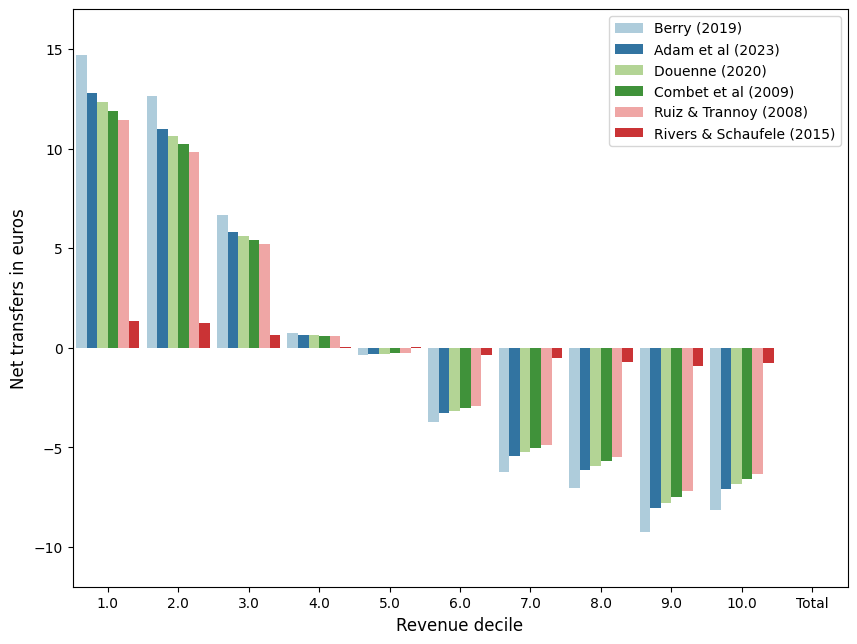

In [7]:
graph_net_transfers(to_graph,carbon_tax_rv,elas_vect = False,bonus_cheques_uc=True)

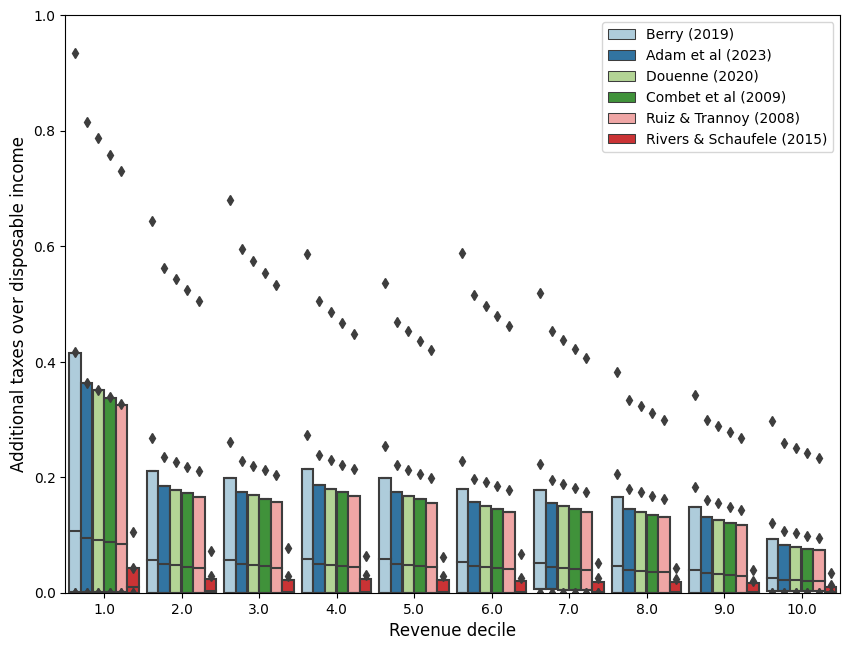

In [8]:
boxplot_effort_rate(menages_reform,carbon_tax_rv,elas_vect=False,bonus_cheques_uc=True)

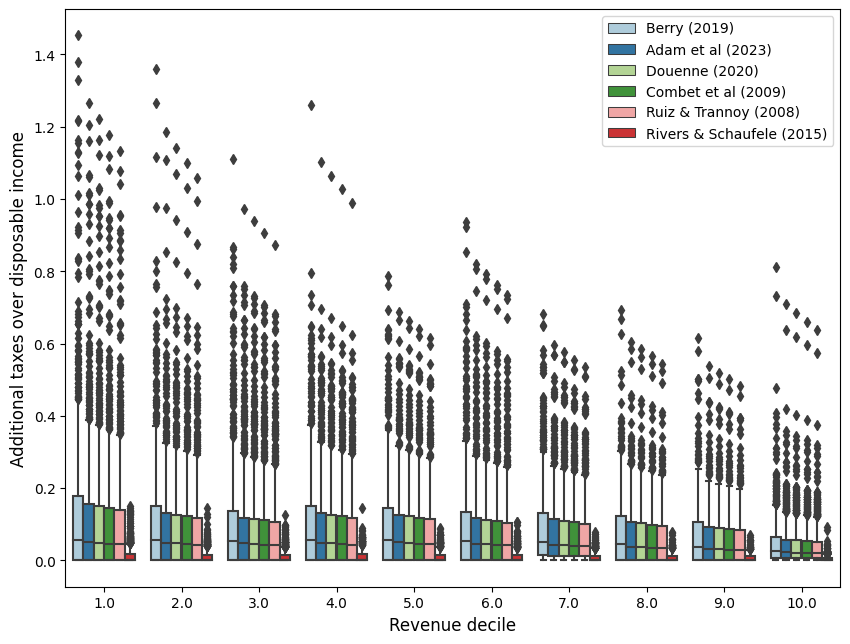

In [8]:
plt.figure(figsize= (10,7.5))
hue_order = ['Berry (2019)', 'Adam et al (2023)', 'Douenne (2020)', 'Combet et al (2009)', 'Ruiz & Trannoy (2008)','Rivers & Schaufele (2015)']
sns.boxplot(data = menages_reform, x = "niveau_vie_decile", y = "Effort_rate", hue = "ref_elasticity", hue_order = hue_order, palette = sns.color_palette("Paired"))
plt.xlabel('Revenue decile', fontdict = {'fontsize' : 12})
plt.ylabel('Additional taxes over disposable income', fontdict = {'fontsize' : 12})
plt.legend()

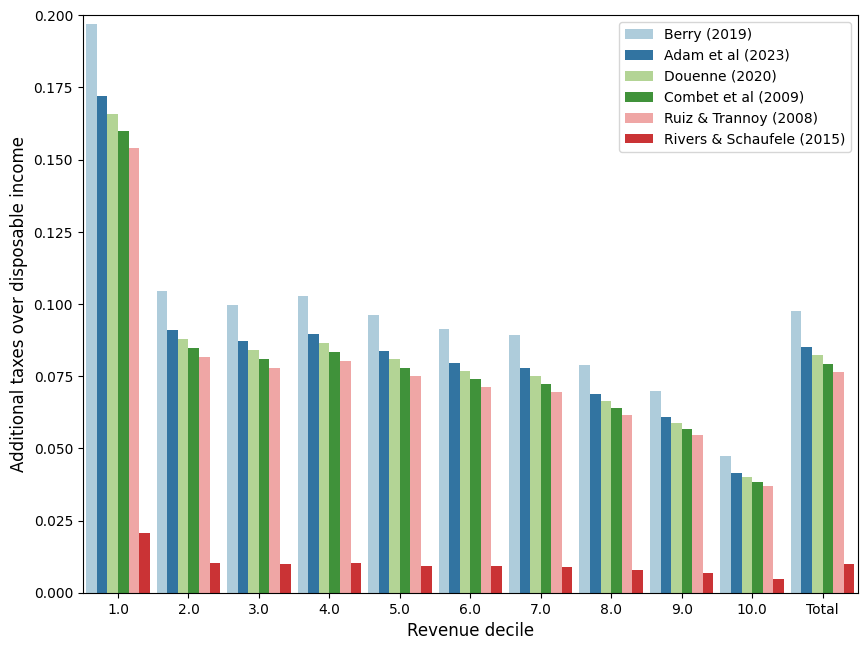

In [9]:
graph_effort_rate(to_graph,carbon_tax_rv,elas_vect = False,bonus_cheques_uc=True)

In [12]:
df_elas_vect = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_Douenne_20.csv'), index_col = [0])
df_elas_vect = pd.melt(frame = df_elas_vect , id_vars = ["niveau_vie_decile",'ref_elasticity'], var_name = 'strate_2', value_name = 'elas_price_1_1')

In [13]:
to_graph_douenne_scal, menages_reform_douenne_scal = simulate_reformes_energie(elas_vect = True, elasticites = df_elas_vect, year = 2019, reform = carbon_tax_rv,bonus_cheques_uc=True)
to_graph_douenne_vect, menages_reform_douenne_vect = simulate_reformes_energie(elas_vect = False, elasticites = elasticites, year = 2019, reform = carbon_tax_rv,bonus_cheques_uc=True)
to_graph_douenne_only = pd.concat([to_graph_douenne_scal, to_graph_douenne_vect])

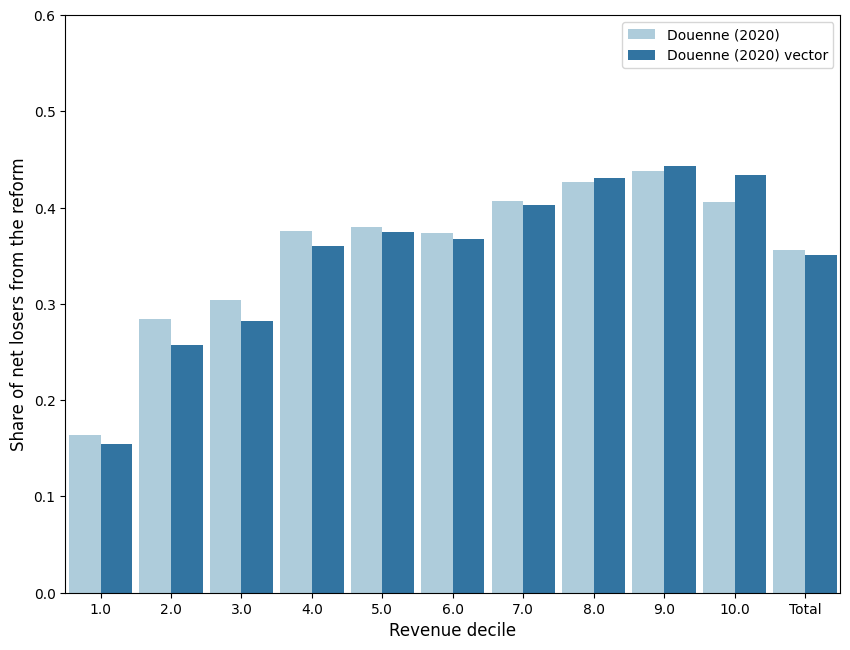

In [14]:
graph_winners_losers(to_graph_douenne_only,carbon_tax_rv,elas_vect=True,bonus_cheques_uc=True)

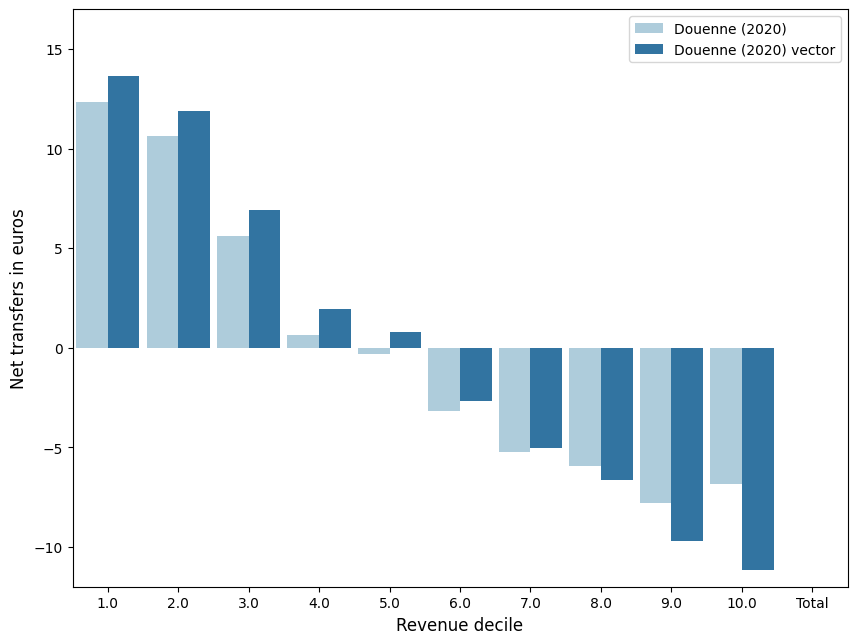

In [15]:
graph_net_transfers(to_graph_douenne_only,carbon_tax_rv,elas_vect=True,bonus_cheques_uc=True)

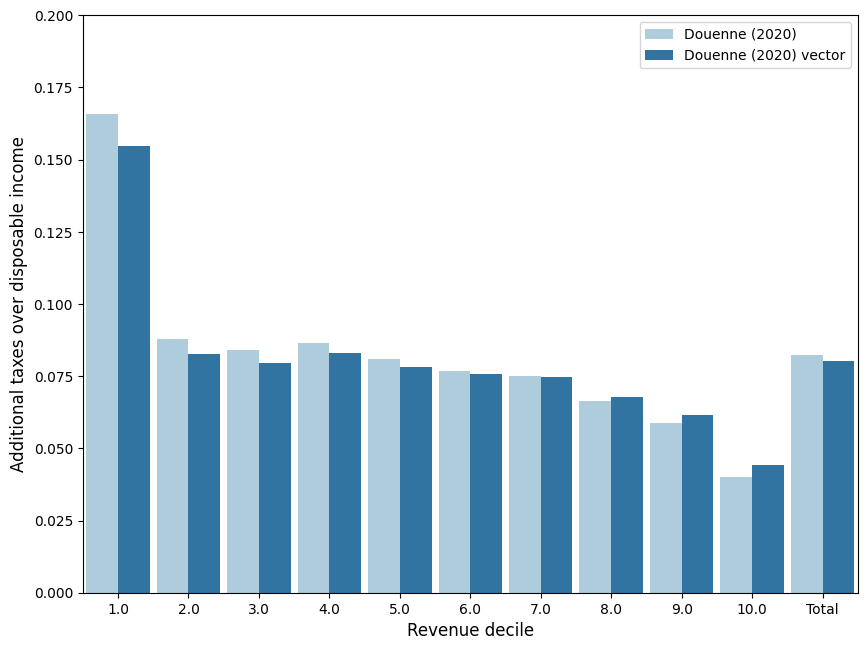

In [16]:
graph_effort_rate(to_graph_douenne_only,carbon_tax_rv,elas_vect=True,bonus_cheques_uc=True)

In [10]:
to_graph_menage, menages_reform_menage = run_all_elasticities(data_elasticities = df_elasticities, year = 2019, reform = carbon_tax_rv, bonus_cheques_uc= False)

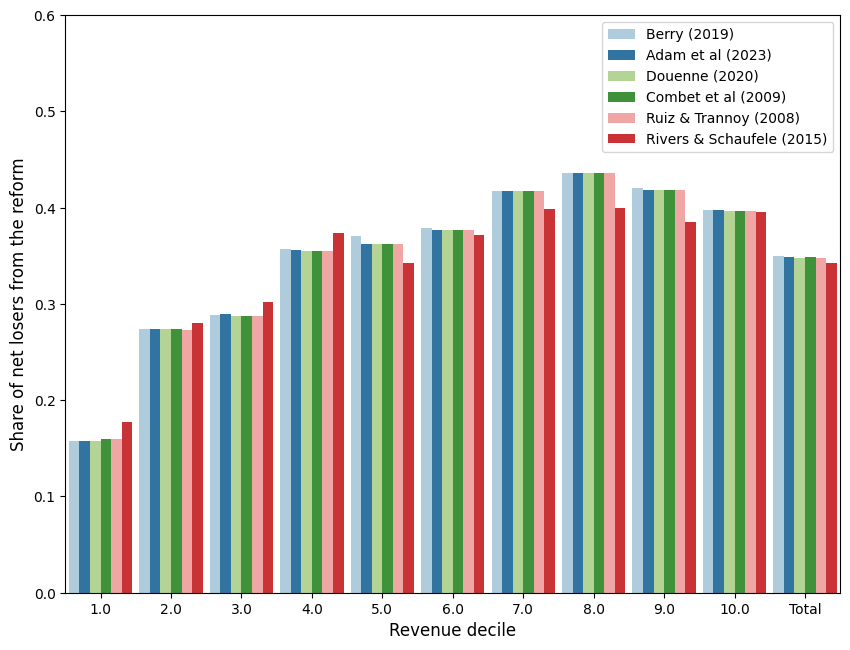

In [11]:
graph_winners_losers(to_graph_menage,carbon_tax_rv,elas_vect=False,bonus_cheques_uc=False)

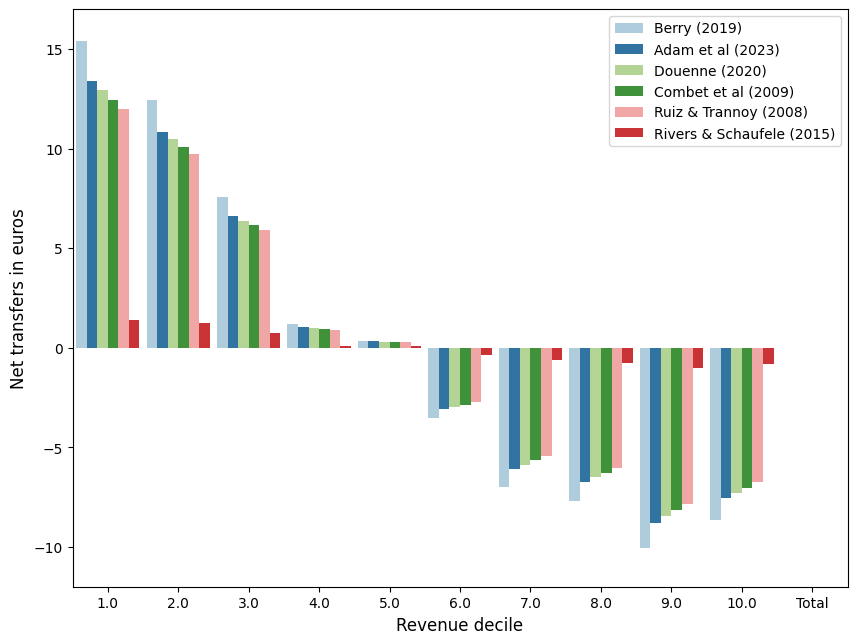

In [12]:
graph_net_transfers(to_graph_menage,carbon_tax_rv,elas_vect=False,bonus_cheques_uc=False)

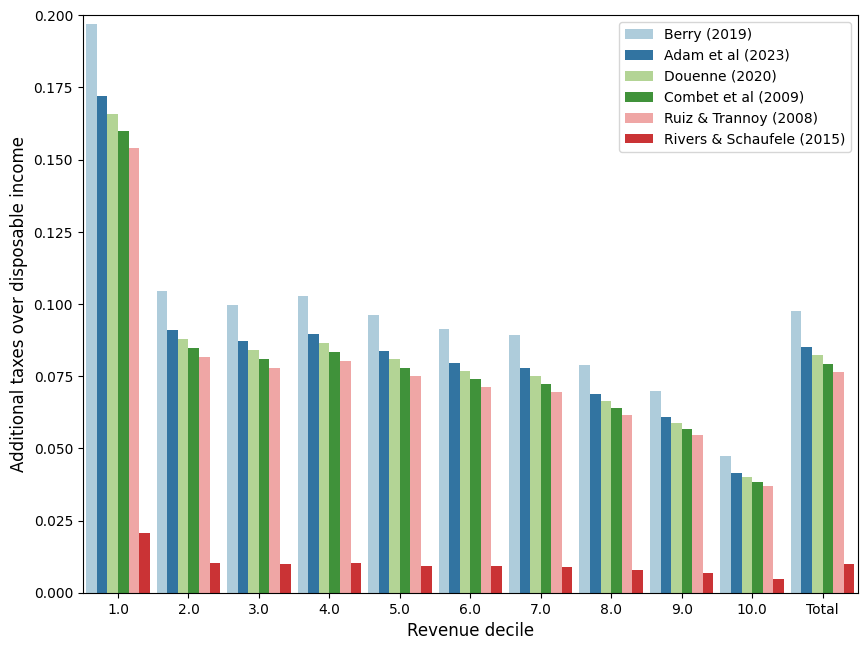

In [13]:
graph_effort_rate(to_graph_menage,carbon_tax_rv,elas_vect=False,bonus_cheques_uc=False)